In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import datetime
import sys
!conda install --yes --prefix {sys.prefix} xlrd
from dateutil.relativedelta import relativedelta

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
df = pd.concat(pd.read_excel("data/Park and Ride In.xlsx", sheet_name=None,skiprows=85,usecols="G:H",nrows = 25), axis = 1,ignore_index=False)
df1 = pd.concat(pd.read_excel("data/Park and Ride Out.xlsx", sheet_name=None,skiprows=85,usecols="G:H",nrows = 25), axis = 1,ignore_index=False)

In [3]:
data = pd.DataFrame.transpose(df)
data1 = pd.DataFrame.transpose(df1)
data = data.fillna(0)
data1 = data1.fillna(0)
data.head()
data1.head()

0   1   2   3   4   5   6   7   8   9   \
Volume 03 07 2017 Unnamed: 6 2017-07-08   2   0   1   0   1   1   0   2   4   
                  Unnamed: 7 2017-07-09   2   0   0   2   0   0   1   2   3   
Volume 10 07 2017 Unnamed: 6 2017-07-15   7   0   0   1   0   0   3   3   3   
                  Unnamed: 7 2017-07-16   1   0   0   0   2   0   2   1   5   
Volume 17 07 2017 Unnamed: 6 2017-07-22   1   3   0   0   0   0   0   3   2   

                              ...  15  16  17   18  19  20  21  22  23  24  
Volume 03 07 2017 Unnamed: 6  ...  39  61  79   90  50  34  10  19  41  14  
                  Unnamed: 7  ...  33  50  77   58  30  15   4   1   3   0  
Volume 10 07 2017 Unnamed: 6  ...  48  59  88  110  60  25  24  10  18   5  
                  Unnamed: 7  ...  28  45  69   66  29   9   6   2   2   0  
Volume 17 07 2017 Unnamed: 6  ...  55  76  81  109  59  26  25  27  13   4  

[5 rows x 25 columns]

In [4]:
data = data.rename({0: 'Timestamp'}, axis=1)
data1 = data1.rename({0:'Timestamp'},axis=1)
data1.head()


Timestamp  1  2  3  4  5  6  7  8  9  ...  15  \
Volume 03 07 2017 Unnamed: 6 2017-07-08  2  0  1  0  1  1  0  2  4  ...  39   
                  Unnamed: 7 2017-07-09  2  0  0  2  0  0  1  2  3  ...  33   
Volume 10 07 2017 Unnamed: 6 2017-07-15  7  0  0  1  0  0  3  3  3  ...  48   
                  Unnamed: 7 2017-07-16  1  0  0  0  2  0  2  1  5  ...  28   
Volume 17 07 2017 Unnamed: 6 2017-07-22  1  3  0  0  0  0  0  3  2  ...  55   

                              16  17   18  19  20  21  22  23  24  
Volume 03 07 2017 Unnamed: 6  61  79   90  50  34  10  19  41  14  
                  Unnamed: 7  50  77   58  30  15   4   1   3   0  
Volume 10 07 2017 Unnamed: 6  59  88  110  60  25  24  10  18   5  
                  Unnamed: 7  45  69   66  29   9   6   2   2   0  
Volume 17 07 2017 Unnamed: 6  76  81  109  59  26  25  27  13   4  

[5 rows x 25 columns]

In [5]:
t = data['Timestamp'].iloc[0]
t.month

7

In [6]:
month = np.zeros(len(data))
month1 = np.zeros(len(data1))
for i in range(len(data)):
    month[i] = data['Timestamp'].iloc[i].month
    month1[i] = data1['Timestamp'].iloc[i].month
data['Month'] = month
data1['Month'] = month1




In [7]:
data1.head(24)

Timestamp  1  2  3  4  5  6  7  8  9  ...  16  \
Volume 03 07 2017 Unnamed: 6 2017-07-08  2  0  1  0  1  1  0  2  4  ...  61   
                  Unnamed: 7 2017-07-09  2  0  0  2  0  0  1  2  3  ...  50   
Volume 10 07 2017 Unnamed: 6 2017-07-15  7  0  0  1  0  0  3  3  3  ...  59   
                  Unnamed: 7 2017-07-16  1  0  0  0  2  0  2  1  5  ...  45   
Volume 17 07 2017 Unnamed: 6 2017-07-22  1  3  0  0  0  0  0  3  2  ...  76   
                  Unnamed: 7 2017-07-23  0  0  0  0  1  0  0  1  2  ...  67   
Volume 24 07 2017 Unnamed: 6 2017-07-29  1  0  0  0  0  0  1  1  6  ...  74   
                  Unnamed: 7 2017-07-30  1  0  1  0  0  0  0  1  4  ...  65   
Volume 31 07 2017 Unnamed: 6 2017-08-05  6  0  0  0  0  0  0  2  7  ...  57   
                  Unnamed: 7 2017-08-06  0  2  0  0  0  0  0  1  3  ...  58   
Volume 07 08 2017 Unnamed: 6 2017-08-12  0  2  1  0  1  0  1  2  5  ...  68   
                  Unnamed: 7 2017-08-13  0  0  0  0  0  0  1  1  3  ...  43   
Volume 14 08 2017 Unnamed: 6 2017-08-19  0  0  0  0  0  0  0  4  2  ...  67   
                  Unnamed: 7 2017-08-20  2  0  4  0  0  0  0  0  0  ...  55   
Volume 21 08 2017 Unnamed: 6 2017-08-26  0  0  0  0  0  0  1  0  1  ...  77   
                  Unnamed: 7 2017-08-27  0  0  0  0  0  0  1  1  0  ...  68   
Volume 28 08 2017 Unnamed: 6 2017-09-02  0  2  0  0  0  0  0  0  2  ...  67   
                  Unnamed: 7 2017-09-03  2  0  0  0  0  0  1  0  1  ...  52   
Volume 04 09 2017 Unnamed: 6 2017-09-09  1  0  0  0  0  0  1  0  6  ...  87   
                  Unnamed: 7 2017-09-10  2  0  0  4  0  1  2  0  2  ...  53   
Volume 11 09 2017 Unnamed: 6 2017-09-16  1  0  0  0  0  0  3  6  4  ...  64   
                  Unnamed: 7 2017-09-17  2  4  0  0  0  0  1  0  2  ...  58   
Volume 18 09 2017 Unnamed: 6 2017-09-23  2  0  0  0  0  0  0  0  4  ...  57   
                  Unnamed: 7 2017-09-24  1  0  0  0  1  1  0  2  4  ...  83   

                               17   18  19  20  21  22  23  24  Month  
Volume 03 07 2017 Unnamed: 6   79   90  50  34  10  19  41  14    7.0  
                  Unnamed: 7   77   58  30  15   4   1   3   0    7.0  
Volume 10 07 2017 Unnamed: 6   88  110  60  25  24  10  18   5    7.0  
                  Unnamed: 7   69   66  29   9   6   2   2   0    7.0  
Volume 17 07 2017 Unnamed: 6   81  109  59  26  25  27  13   4    7.0  
                  Unnamed: 7   73   72  32  13   7   4   0   4    7.0  
Volume 24 07 2017 Unnamed: 6  105  101  54  21  25  11  21   7    7.0  
                  Unnamed: 7   73   79  45  12   4   0   4   2    7.0  
Volume 31 07 2017 Unnamed: 6   85   74  57  22  15   9  22   9    8.0  
                  Unnamed: 7   63   83  28   7   7   4   1   0    8.0  
Volume 07 08 2017 Unnamed: 6   92   97  60  34  13   6  20   3    8.0  
                  Unnamed: 7   81   68  30   9   7   3   0   0    8.0  
Volume 14 08 2017 Unnamed: 6  116  109  77  38  28  10  14   6    8.0  
                  Unnamed: 7   59   64  21  12   8   1   3   0    8.0  
Volume 21 08 2017 Unnamed: 6   98  109  58  36  16  17  10   4    8.0  
                  Unnamed: 7   83   93  50   8   4   5   2   1    8.0  
Volume 28 08 2017 Unnamed: 6  117  117  77  31  19  21  16   6    9.0  
                  Unnamed: 7   57   45  22   8   8   2   0   1    9.0  
Volume 04 09 2017 Unnamed: 6   84  110  44  22  18  21  30   6    9.0  
                  Unnamed: 7   80   67  32   9   3   2   1   0    9.0  
Volume 11 09 2017 Unnamed: 6  122  110  80  33  21  13  15   3    9.0  
                  Unnamed: 7   54   48  24   9   1   7   2   2    9.0  
Volume 18 09 2017 Unnamed: 6   96  155  75  28  18   9  34   7    9.0  
                  Unnamed: 7   86   50  33   7   5   1   0   0    9.0  

[24 rows x 26 columns]

In [8]:
Jan_data = data[data['Month'].eq(1)]
Jan_data1 = data1[data1['Month'].eq(1)]
Jan_data = pd.DataFrame.drop(Jan_data, columns = ['Timestamp','Month'])
Jan_data1 = pd.DataFrame.drop(Jan_data1, columns = ['Timestamp','Month'])
Feb_data = data[data['Month'].eq(2)]
Feb_data1 = data1[data1['Month'].eq(2)]
Feb_data = pd.DataFrame.drop(Feb_data, columns = ['Timestamp','Month'])
Feb_data1 = pd.DataFrame.drop(Feb_data1, columns = ['Timestamp','Month'])
March_data = data[data['Month'].eq(3)]
March_data1 = data1[data1['Month'].eq(3)]
March_data = pd.DataFrame.drop(March_data, columns = ['Timestamp','Month'])
March_data1 = pd.DataFrame.drop(March_data1, columns = ['Timestamp','Month'])
April_data = data[data['Month'].eq(4)]
April_data1 = data1[data1['Month'].eq(4)]
April_data = pd.DataFrame.drop(April_data, columns = ['Timestamp','Month'])
April_data1 = pd.DataFrame.drop(April_data1, columns = ['Timestamp','Month'])
May_data = data[data['Month'].eq(5)]
May_data1 = data1[data1['Month'].eq(5)]
May_data = pd.DataFrame.drop(May_data, columns = ['Timestamp','Month'])
May_data1 = pd.DataFrame.drop(May_data1, columns = ['Timestamp','Month'])
June_data = data[data['Month'].eq(6)]
June_data1 = data1[data1['Month'].eq(6)]
June_data = pd.DataFrame.drop(June_data, columns = ['Timestamp','Month'])
June_data1 = pd.DataFrame.drop(June_data1, columns = ['Timestamp','Month'])
July_data = data[data['Month'].eq(7)]
July_data1 = data1[data1['Month'].eq(7)]
July_data = pd.DataFrame.drop(July_data, columns = ['Timestamp','Month'])
July_data1 = pd.DataFrame.drop(July_data1, columns = ['Timestamp','Month'])
Aug_data = data[data['Month'].eq(8)]
Aug_data1 = data1[data1['Month'].eq(8)]
Aug_data = pd.DataFrame.drop(Aug_data, columns = ['Timestamp','Month'])
Aug_data1 = pd.DataFrame.drop(Aug_data1, columns = ['Timestamp','Month'])
Sept_data = data[data['Month'].eq(9)]
Sept_data1 = data1[data1['Month'].eq(9)]
Sept_data = pd.DataFrame.drop(Sept_data, columns = ['Timestamp','Month'])
Sept_data1 = pd.DataFrame.drop(Sept_data1, columns = ['Timestamp','Month'])
Oct_data = data[data['Month'].eq(10)]
Oct_data1 = data1[data1['Month'].eq(10)]
Oct_data = pd.DataFrame.drop(Oct_data, columns = ['Timestamp','Month'])
Oct_data1 = pd.DataFrame.drop(Oct_data1, columns = ['Timestamp','Month'])
Nov_data = data[data['Month'].eq(11)]
Nov_data1 = data1[data1['Month'].eq(11)]
Nov_data = pd.DataFrame.drop(Nov_data, columns = ['Timestamp','Month'])
Nov_data1 = pd.DataFrame.drop(Nov_data1, columns = ['Timestamp','Month'])
Dec_data = data[data['Month'].eq(12)]
Dec_data1 = data1[data1['Month'].eq(12)]
Dec_data = pd.DataFrame.drop(Dec_data, columns = ['Timestamp','Month'])
Dec_data1 = pd.DataFrame.drop(Dec_data1, columns = ['Timestamp','Month'])

In [9]:
Jan_data1.head()

1   2   3   4   5   6   7   8   9   10  ...  15  \
Volume 01 01 2018 Unnamed: 6   0   0   0   0   0   0   0   3   4   4  ...  59   
                  Unnamed: 7   1   3   0   0   0   0   1   1   3   6  ...  47   
Volume 08 01 2018 Unnamed: 6   1   2   0   0   0   0   0   1   0   4  ...  54   
                  Unnamed: 7   1   0   1   0   0   0   0   0   1   0  ...  42   
Volume 15 01 2018 Unnamed: 6   0   0   0   0   0   0   1   0   3   1  ...  46   

                              16   17   18  19  20  21  22  23  24  
Volume 01 01 2018 Unnamed: 6  81  114  142  67  51  38  31  43  11  
                  Unnamed: 7  62   62   39  32   7   4   1   2   0  
Volume 08 01 2018 Unnamed: 6  87  140   93  59  22  14   5  17   8  
                  Unnamed: 7  59   58   49  16   6   5   0   2   2  
Volume 15 01 2018 Unnamed: 6  76  114  105  58  25  22  11  26  13  

[5 rows x 24 columns]

In [10]:
Jan_in = np.zeros(24)
Jan_out = np.zeros(24)
Feb_in = np.zeros(24)
Feb_out = np.zeros(24)
March_in = np.zeros(24)
March_out = np.zeros(24)
April_in = np.zeros(24)
April_out = np.zeros(24)
May_in = np.zeros(24)
May_out = np.zeros(24)
June_in = np.zeros(24)
June_out = np.zeros(24)
July_in = np.zeros(24)
July_out = np.zeros(24)
Aug_in = np.zeros(24)
Aug_out = np.zeros(24)
Sept_in = np.zeros(24)
Sept_out = np.zeros(24)
Oct_in = np.zeros(24)
Oct_out = np.zeros(24)
Nov_in = np.zeros(24)
Nov_out = np.zeros(24)
Dec_in = np.zeros(24)
Dec_out = np.zeros(24)

for L in range(24):
    index = L+1
    Jan_in[L] = np.mean(Jan_data[index].iloc[:])
    Jan_out[L] = np.mean(Jan_data1[index].iloc[:])
    Feb_in[L] = np.mean(Feb_data[index].iloc[:])
    Feb_out[L] = np.mean(Feb_data1[index].iloc[:])
    March_in[L] = np.mean(March_data[index].iloc[:])
    March_out[L] = np.mean(March_data1[index].iloc[:])
    April_in[L] = np.mean(April_data[index].iloc[:])
    April_out[L] = np.mean(April_data1[index].iloc[:])
    May_in[L] = np.mean(May_data[index].iloc[:])
    May_out[L] = np.mean(May_data1[index].iloc[:])
    June_in[L] = np.mean(June_data[index].iloc[:])
    June_out[L] = np.mean(June_data1[index].iloc[:])
    July_in[L] = np.mean(July_data[index].iloc[:])
    July_out[L] = np.mean(July_data1[index].iloc[:])
    Aug_in[L] = np.mean(Aug_data[index].iloc[:])
    Aug_out[L] = np.mean(Aug_data1[index].iloc[:])
    Sept_in[L] = np.mean(Sept_data[index].iloc[:])
    Sept_out[L] = np.mean(Sept_data1[index].iloc[:])
    Oct_in[L] = np.mean(Oct_data[index].iloc[:])
    Oct_out[L] = np.mean(Oct_data1[index].iloc[:])
    Nov_in[L] = np.mean(Nov_data[index].iloc[:])
    Nov_out[L] = np.mean(Nov_data1[index].iloc[:])
    Dec_in[L] = np.mean(Dec_data[index].iloc[:])
    Dec_out[L] = np.mean(Dec_data1[index].iloc[:])


In [11]:
IN = np.zeros((12,24))
IN[0,:] = Jan_in
IN[1,:] = Feb_in
IN[2,:] = March_in
IN[3,:] = April_in
IN[4,:] = May_in
IN[5,:] = June_in
IN[6,:] = July_in
IN[7,:] = Aug_in
IN[8,:] = Sept_in
IN[9,:] = Oct_in
IN[10,:] = Nov_in
IN[11,:] = Dec_in

OUT = np.zeros((12,24))
OUT[0,:] = Jan_out
OUT[1,:] = Feb_out
OUT[2,:] = March_out
OUT[3,:] = April_out
OUT[4,:] = May_out
OUT[5,:] = June_out
OUT[6,:] = July_out
OUT[7,:] = Aug_out
OUT[8,:] = Sept_out
OUT[9,:] = Oct_out
OUT[10,:] = Nov_out
OUT[11,:] = Dec_out

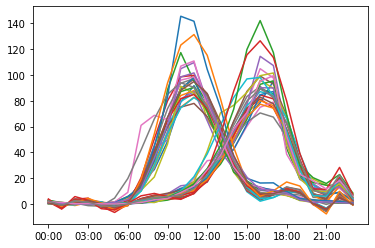

In [12]:
MONTH_POWER = np.zeros((12,1440))
for Z in range(12):
    #Fitting a 10 degree polynomial to the data. This will enable me to creat a probability denisty function(pdf)
    #for the time of day at which a vehicle will enter the Park and Ride. Although a higher degree polynomial could be used,
    #this can lead intergration warnings further down the line.
    x = np.array([0.,1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,11.,12.,13.,14.,15.,16.,17.,18.,19.,20.,21.,22.,23.])
    plt.plot(x,IN[Z])
    plt.grid()

    fit_e = np.polyfit(x,IN[Z], 10)

    fitted_curve_e = fit_e[10] + (x)*fit_e[9] + (x**2)*fit_e[8]+(x**3)*fit_e[7]+(x**4)*fit_e[6]+(x**5)*fit_e[5]+(x**6)*fit_e[4]+(x**7)*fit_e[3]+(x**8)*fit_e[2]+(x**9)*fit_e[1]+(x**10)*fit_e[0]

    denom_e = np.trapz(fitted_curve_e)

    #Scaling using denom so the area under the curve is 1
    pdf_enter = (fit_e[10] + (x)*fit_e[9] + (x**2)*fit_e[8]+(x**3)*fit_e[7]+(x**4)*fit_e[6]+(x**5)*fit_e[5]+(x**6)*fit_e[4]+(x**7)*fit_e[3]+(x**8)*fit_e[2]+(x**9)*fit_e[1]+(x**10)*fit_e[0])/denom_e
    plt.plot(fitted_curve_e)
    plt.grid()
    plt.xticks(np.arange(0, 24, step=3),('00:00','03:00','06:00','09:00','12:00','15:00','18:00','21:00','24:00'))

    #Fitting a 10 degree polynomial to the data. This will enable me to creat a probability denisty function(pdf)
    #for the time of day at which a vehicle will leave the Park and Ride

    fit = np.polyfit(x,OUT[Z],10)

    fitted_curve_l = fit[10] + (x)*fit[9] + (x**2)*fit[8]+(x**3)*fit[7]+(x**4)*fit[6]+(x**5)*fit[5]+(x**6)*fit[4]+(x**7)*fit[3]+(x**8)*fit[2]+(x**9)*fit[1]+(x**10)*fit[0]

    denom = np.trapz(fitted_curve_l)
    #Scaling using denom so the area under the curve is 1
    pdf_leave = (fit[10] + (x)*fit[9] + (x**2)*fit[8]+(x**3)*fit[7]+(x**4)*fit[6]+(x**5)*fit[5]+(x**6)*fit[4]+(x**7)*fit[3]+(x**8)*fit[2]+(x**9)*fit[1]+(x**10)*fit[0])/denom
    plt.plot(x,OUT[Z])
    plt.plot(fitted_curve_l)
    plt.grid()
    plt.xticks(np.arange(0, 24, step=3),('00:00','03:00','06:00','09:00','12:00','15:00','18:00','21:00','24:00'))
    #print(len(pdf_enter))

    num = int(np.sum(IN[Z])*0.3)

    #Using the Python module Scipy to create a probability density funtion for the time at which a vehicle enters the
    #park and ride. This is then randomly sampled to create the first bit of data for the mock dataset
    import scipy.stats as st

    samp_enter = np.zeros(num)

    class pdf(st.rv_continuous):
        def _pdf(self,x):
            return (fit_e[10] + (x)*fit_e[9] + (x**2)*fit_e[8]+(x**3)*fit_e[7]+(x**4)*fit_e[6]+(x**5)*fit_e[5]+(x**6)*fit_e[4]+(x**7)*fit_e[3]+(x**8)*fit_e[2]+(x**9)*fit_e[1]+(x**10)*fit_e[0])/denom_e

    enter_pdf = pdf(a=0,b=23.98)

    for Q in range(len(samp_enter)):
        samp_enter[Q] = enter_pdf.rvs()

    #Using the Python module Scipy to create a probability density funtion for the time at which a vehicle leaves the
    #park and ride. This is then randomly sampled to create more data for the mock dataset    
    samp_leave = np.zeros(num)

    class pdf(st.rv_continuous):
        def _pdf(self,x):
            return (fit[10] + (x)*fit[9] + (x**2)*fit[8]+(x**3)*fit[7]+(x**4)*fit[6]+(x**5)*fit[5]+(x**6)*fit[4]+(x**7)*fit[3]+(x**8)*fit[2]+(x**9)*fit[1]+(x**10)*fit[0])/denom
    leave_pdf = pdf(a=0,b=23.98)

    for Q in range(len(samp_leave )):
        samp_leave [Q] = leave_pdf.rvs()

    #For each vehicle randomly pick whether they choose to prioritise time or cost.    
    import random

    Priority = ["Time" for x in range(num)]

    dfC = pd.read_csv("data/sspsbpniv.csv")

    MONTH= np.zeros(len(dfC))
    for i in range(len(dfC)):
        MONTH[i] = datetime.datetime.strptime(dfC['Date'].iloc[i], '%d/%m/%Y').date().month

    dfC['Month'] = MONTH
    month = Z+1
    dfc = dfC[dfC['Month'].eq(month)]

    Cost = np.zeros(48)
    for i in range(1,49,1):
        dfc1 = dfc[dfc['HalfHour'].eq(i)]
        Cost[i-1] = np.mean(dfc1['import(VAT)'].iloc[:])
    cost = np.zeros(1440)

    for i in range(len(Cost)):
        cost[(30*(i-1))+30:(30*i)+30] = Cost[i]


    #This is a smart charging algorithm for electric vehicles. It allows the user to chose whether to priorise the speed of 
    #charging or the cost of the charging. It then charges up the vehicle to the level desired by the user, which here is 
    #assumed to be as much as possible, either in the most time-efficient manner or the most cost-efficient manner, by the time
    #the vehicle needs to be unplugged.

    #The algorithm will take as its inputs;the time the vehicle enters/is plugged in, the time the vehicle needs to leave, the
    #prioirty of the user(time or cost), the intial charge of the vehicle and the desired level of charge. Here it is assumed
    #that the user will want to charge up their vehicle as much as possible, which will often be to full capacity, and so the
    #algoirthm below calculates the maximum charge possible and uses this as the desired level.

    #Create a Pandas DataFrame for the first 3 parts algorithm input data. This is the time the vehicle gets plugged in(Enter),
    #assuming the vehicle gets plugges in as soon as it arrives, and the time the vehicle is plugged out(Leave), assuming there
    #is no delay between unplugging the vehicle and leaving.
    data = {'Enter' : samp_enter, 'Leave' : samp_leave, 'Priority': Priority}
    df = pd.DataFrame(data)

    #Initialise verctors
    max_potential_charge = np.zeros(len(df))
    length_stay = np.zeros(len(df))
    charge_if_max_power_for_length_stay = np.zeros(len(df))
    Initial_charge = np.zeros(len(df))

    #Define a round down function in order to deal with Python's rounding errors when storing exact numbers as floats. This
    #becomes important when indexing later on in the actual charging part of the algorithm. 

    def round_down(f, decimal_places=0):
        g = 10 ** decimal_places
        return math.floor(f * g) / g

    #Calculate the maximum charge in kWh that each vehicle can be delivered to each vehicle to based on how long it is plugged 
    #in and state the intial charge. Here it is assumed the inital charge is the same for every vehicle and that each
    #vehicle can be charged up to a max of 25KWh.
    for i in range(len(df)):
    #Convert the plugged in time and plugged out time to minutes
        time_in = int(math.ceil(df['Enter'].iloc[i] * 60))
        time_out = int(math.floor(df['Leave'].iloc[i]* 60))
    #Assume every vehicle has an intial charge of 12.5

        Initial_charge[i] = 12.5
        if time_out > time_in:
    #Calculate the duration of the stay
            length_stay[i] = time_out - time_in
    #Calculate the maximum amount of charge that can be delivered to the vehicle
            charge_if_max_power_for_length_stay[i] = (7/60) * length_stay[i]
            if charge_if_max_power_for_length_stay[i] > 25 - Initial_charge[i]:
                max_potential_charge[i] = 25 - Initial_charge[i]
            elif charge_if_max_power_for_length_stay[i] < 25 - Initial_charge[i]:
                max_potential_charge[i] = charge_if_max_power_for_length_stay[i]

        elif time_out < time_in:
            length_stay[i] = (1440 - time_in) + time_out 
            charge_if_max_power_for_length_stay[i] = (7/60) * length_stay[i]
            if charge_if_max_power_for_length_stay[i] > 25 - Initial_charge[i]:
                max_potential_charge[i] = 25 - Initial_charge[i]
            elif charge_if_max_power_for_length_stay[i] < 25 - Initial_charge[i]:
                max_potential_charge[i] = charge_if_max_power_for_length_stay[i]

    df['max_deliverable_charge'] = max_potential_charge
    df['Initial_charge'] = Initial_charge
    energy_desired = np.zeros(len(df))

    #Calculate the total energy that needs to be delivered to each vehicle. Here we assume each user wamts to charge their 
    #vehicle as much as possible
    for e in range(len(df)):   
        if 25 - df['Initial_charge'].iloc[e] > df['max_deliverable_charge'].iloc[e]:
            energy_desired[e] = df['max_deliverable_charge'].iloc[e] + df['Initial_charge'].iloc[e] 
        elif 25 - df['Initial_charge'].iloc[e] <= df['max_deliverable_charge'].iloc[e]:
            energy_desired[e] = 25
    df['energy_desired']= energy_desired
    df['charge_needed'] = df['energy_desired'] - df['Initial_charge']

    #initialise energy and power matrices. Each row has 1440 columns representing a minute of the day each. The power matrix 
    #resprents the power being delivered to each vehicle at each minute of the day. The energy matrix represents the charge 
    #in the vehicles battery. The final_energy vector is used to check that the algorithm works and that the vehicles have been
    #charged up to the desired levels.
    power = np.zeros((len(df),1440))
    energy = np.zeros((len(df),1440))
    final_energy = np.zeros(len(df))

    #Set the maximum charging power to 7kW
    power_max = 7

    #This below is the actual charging part of the algorithm. It first calculates the time the vehicle is plugged in and plugged out
    #so it can use these for indexing. If these times are not in minutes already then they are converted to minutes.     
    for i in range(len(df)):
    #The math.ceil rounds up always and the math.floor rounds down always
        time_in = int(math.ceil(df['Enter'].iloc[i]*60))
        time_out = int(math.floor(df['Leave'].iloc[i]*60))
        energy[i,time_in] = df['Initial_charge'].iloc[i]

    #First consider vehicles that enter/leave on the same day
        if time_out > time_in:

    #If the priority is time then the vehicle charges up as quickly as possible
            if df['Priority'].iloc[i] == 'Time':
                t = time_in + 1
                power[i,time_in] = power_max
    #The below while loop, followed by the additional power term is used to make sure that the vehicles charge up to exactly 
    #the charge desired and not slightly above or below this.
                while energy[i,t-1]< (df['energy_desired'].iloc[i]-(7/60)):
                    power[i,t] = power_max
                    energy[i,t] = df['Initial_charge'].iloc[i] + (power[i,time_in:t+1].sum())/60
                    t=t+1
                power[i,t] = (df['energy_desired'].iloc[i] - energy[i,t-1])*60
                energy[i,t] = energy [i,t-1] + (power[i,t])/60
                final_energy[i] = energy[i,t]


    #If the prioirty is cost, first order the minutes of the day during the vehicle's stay by cost(cheapest to highest) and
    #charge for the smallest number of cheapest minutes to meet the desired charge.
            elif df['Priority'].iloc[i] == 'Cost':
    #The no_min_charging gives the smallest number of minutes required to charge the vehicle. Math.ceil is used to round up
    #such that the vehicle is charged at max power for (no_min_charging - 1) minutes and then at a smaller power for the
    #final minute to reach the desired level. My round_down function is used here to avoid the rounding errors in python 
    #when storing exact numbers as floats.
                no_min_charging = math.ceil(round_down(df['charge_needed'].iloc[i],2)/(7/60))
    #Here np.argsort is used to order the elements of the cost vector during the vehicles stay from smallest to largest. The
    #vehicle is not charged on the minute when it leaves.
                sorted_arguments = np.argsort(cost[time_in:time_out])
    #For the (no_min_charging - 1) cheapest minutes charge at max power(indexing starts at 0)
                arguments_to_charge = sorted_arguments[:int(no_min_charging-1)]
                for j in range(len(arguments_to_charge)):
                    power[i,(time_in + arguments_to_charge[j])] = power_max 
    #The 'argument_to_charge' is the index of the final minute which is required to charge up the vehicle to the exact amount
    #desired.
                argument_to_charge = sorted_arguments[int(no_min_charging-1)]

                power[i,time_in + argument_to_charge] = (df['energy_desired'].iloc[i] - (df['Initial_charge'].iloc[i] + (power[i,time_in:time_out].sum())/60))*60
    #Calculate the charge in the vehicle's battery at each minute.
                for k in range(len(sorted_arguments)+1):
                    energy[i,time_in+k] = df['Initial_charge'].iloc[i] + (power[i,time_in:time_in+k].sum())/60

                final_energy[i] = energy[i,time_out]

    #Now consider vehicles that stay overnight.                
        elif time_out < time_in:

    #If the vehicle can be charged up on the same day the code for prioritising time is the same as above
            if df['charge_needed'].iloc[i] < ((7/60)*(1440 - time_in)): 
                if df['Priority'].iloc[i] == 'Time':
                    t = time_in + 1
                    power[i,time_in] = power_max
                    while energy[i,t-1]< (df['energy_desired'].iloc[i]-(7/60)):
                        power[i,t] = power_max
                        energy[i,t] = df['Initial_charge'].iloc[i] + (power[i,time_in:t+1].sum())/60
                        t=t+1
                    power[i,t] = (df['energy_desired'].iloc[i] - energy[i,t-1])*60
                    energy[i,t] = energy [i,t-1] + (power[i,t])/60
                    final_energy[i] = energy[i,t] 

    #If the prioirty is cost, first order the minutes of the day during the vehicle's stay by cost(cheapest to highest) and 
    #charge for the necessary number of cheapest minutes at max power to meet the desired charge. The code is slightly different
    #to that for vehicles that are are plugged in/out on the same day but achieves the same goal. If a vehicle prioritises cost 
    #the code is the same regardless of whether there is theoretically enough time on the day of plugging in to charge it or not
    #because what matters is when over the two days the energy is cheapest.
                elif df['Priority'].iloc[i] == 'Cost':

    #The no_min_charging gives the smallest number of minutes required to charge the vehicle. Math.ceil is used to round up
    #such that the vehicle is charged at max power for (no_min_charging - 1) minutes and then at a smaller power for the
    #final minute to reach the desired level. My round_down function is used here to avoid the rounding errors in python 
    #when storing exact numbers as floats.
                    no_min_charging = math.ceil(round_down(df['charge_needed'].iloc[i],2)/(7/60))
    #array3 contains all the cost elements for the total stay/plugged in duration of the vehicle. The vehicle is not charged on
    #the minute that it leaves.
                    array1 = cost[time_in:]
                    array2 = cost[:time_out]
                    array3 = np.append(array1,array2)
    #It now organises all the elements of array 3 from cheapest cost to most expensive cost and charge for (no_min_charging -1)
    #minutes at max power. 
                    sorted_arguments = np.argsort(array3)
                    arguments_to_charge = sorted_arguments[:(int(no_min_charging-1))]
                    for U in range(len(arguments_to_charge)):
                        if arguments_to_charge[U] < (1440-time_in):
                            power[i,time_in + arguments_to_charge[U]-1] = power_max
                        elif arguments_to_charge[U] >=(1440 - time_in):
                            power[i,arguments_to_charge[U]-(1440-time_in)] = power_max
    #For the final minute required to charge the vehicle exactly to the desired energy,the algorithm finds the index and the 
    #required power to charge at.
                    argument_to_charge = sorted_arguments[(int(no_min_charging-1))]
                    if (argument_to_charge+time_in) < 1440:
                        power[i,time_in + argument_to_charge] = (df['charge_needed'].iloc[i] - (power[i,time_in:].sum())/60 - (power[i,:time_out].sum())/60)*60
                    elif (argument_to_charge+time_in) >= 1440:
                        power[i,(argument_to_charge - 1440 + time_in)] = (df['charge_needed'].iloc[i] - (power[i,time_in:].sum())/60 - (power[i,:time_out].sum())/60)*60
    #Now the charge stored in the vehicles battery for each minute is calculated.                
                    for k in range(len(sorted_arguments)+1):
                        if k <(1440 - time_in):
                            energy[i,time_in+k] = df['Initial_charge'].iloc[i] + (power[i,time_in:time_in+k].sum())/60

                        elif k>=(1440 - time_in):
                            energy[i,k-(1440-time_in)] =  energy[i,1439] + (power[i,:k-(1440-time_in)].sum())/60
                        final_energy[i] = energy[i,time_out]    

    #The same idea remains for occasions where no matter what the vehicle will need to be charged both on the day it arrives
    #and the next day
            elif df['charge_needed'].iloc[i] > ((7/60)*(1440 - time_in)): 
                if df['Priority'].iloc[i] == 'Time':
                    power[i,time_in] = power_max
                    t = time_in + 1
    #For the whole of the the first day charge at max power. The inequality is less than 1440 and not less than or equal to
    #because of the way python does indexing(i.e starting at zero so the final index is 1439)
                    while t < 1440:
                        power[i,t] = power_max
                        energy[i,t] = df['Initial_charge'].iloc[i] + (power[i,time_in:t+1].sum())/60
                        t = t + 1
    #Calculate how much charge is still needed and therefore for how many minutes on the second day charging is still required.
                    charge_still_required = df['charge_needed'].iloc[i] - ((7/60)*(1440 - time_in))
                    minutes_to_charge = math.ceil(charge_still_required / (7/60))
                    t =0
    #The below while loop, followed by the additional power term is used to make sure that the vehicles charge up to exactly 
    #the charge desired and not slightly above or below this.
                    while t < (minutes_to_charge-1):
                        power[i,t] = power_max
                        energy[i,t] = energy[i,1439] + (power[i,:t+1].sum())/60   
                        t = t + 1
                    power[i,t] = (df['energy_desired'].iloc[i] - energy[i,t-1])*60
                    energy[i,t] = energy [i,t-1] + (power[i,t])/60
                    final_energy[i] = energy[i,(minutes_to_charge - 1)]
                    #energy[i,minutes_to_charge:time_out] = energy[i,t-1] 


                elif df['Priority'].iloc[i] == 'Cost':
    #The no_min_charging gives the smallest number of minutes required to charge the vehicle. Math.ceil is used to round up
    #such that the vehicle is charged at max power for (no_min_charging - 1) minutes and then at a smaller power for the
    #final minute to reach the desired level. My round_down function is used here to avoid the rounding errors in python 
    #when storing exact numbers as floats.
                    no_min_charging = math.ceil(round_down(df['charge_needed'].iloc[i],2)/(7/60))
                    array1 = cost[time_in:]
                    array2 = cost[:time_out]
    #array3 contains all the cost elements for the total stay/plugged in duration of the vehicle. The vehicle is not charged on
    #the minute that it leaves.
                    array3 = np.append(array1,array2)
                    sorted_arguments = np.argsort(array3)
    #For the (no_min_charging - 1) cheapest minutes charge at max power
                    arguments_to_charge = sorted_arguments[:(int(no_min_charging-1))]
                    for U in range(len(arguments_to_charge)):
                        if arguments_to_charge[U] < (1440-time_in):
                            power[i,time_in + arguments_to_charge[U]-1] = power_max
                        elif arguments_to_charge[U] >=(1440 - time_in):
                            power[i,arguments_to_charge[U]-(1440-time_in)] = power_max
    #For the final minute required to charge the vehicle exactly to the desired energy,the algorithm finds the index and the 
    #required power to charge at.    
                    argument_to_charge = sorted_arguments[(int(no_min_charging-1))]
                    if (argument_to_charge+time_in) < 1440:
                        power[i,time_in + argument_to_charge] = (df['charge_needed'].iloc[i] - (power[i,time_in:].sum())/60 - (power[i,:time_out].sum())/60)*60
                    elif (argument_to_charge+time_in) >= 1440:
                        power[i,(argument_to_charge - 1440 + time_in)] = (df['charge_needed'].iloc[i] - (power[i,time_in:].sum())/60 - (power[i,:time_out].sum())/60)*60
    #Now the charge stored in the vehicles battery for each minute is calculated.                 
                    for k in range(len(sorted_arguments)+1):
                        if k <(1440 - time_in):
                            energy[i,time_in+k] = df['Initial_charge'].iloc[i] + (power[i,time_in:time_in+k].sum())/60

                        elif k>=(1440 - time_in):
                            energy[i,k-(1440-time_in)] =  energy[i,1439] + (power[i,:k-(1440-time_in)].sum())/60
                        final_energy[i] = energy[i,time_out]  

    for A in range(1440):
        MONTH_POWER[Z,A] = (np.sum(power[:,A]))

17280


([<matplotlib.axis.XTick at 0x12c3e7d5c08>,
 <a list of 12 Text xticklabel objects>)

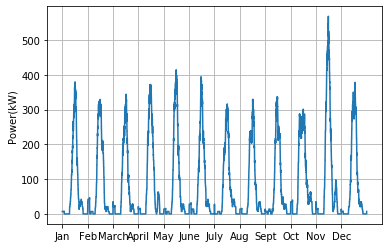

In [13]:
Jan = MONTH_POWER[0,:]
Feb = MONTH_POWER[1,:]
March = MONTH_POWER[2,:]
April = MONTH_POWER[3,:]
May = MONTH_POWER[4,:]
June = MONTH_POWER[5,:]
July = MONTH_POWER[6,:]
Aug = MONTH_POWER[7,:]
Sept = MONTH_POWER[8,:]
Oct = MONTH_POWER[9,:]
Nov = MONTH_POWER[10,:]
Dec = MONTH_POWER[11,:]

E1 = np.append(Jan,Feb)
E2 = np.append(March,April)
E3 = np.append(May,June)
E4 = np.append(July,Aug)
E5 = np.append(Sept,Oct)
E6 = np.append(Nov,Dec)
E7 = np.append(E1,E2)
E8 = np.append(E3,E4)
E9 = np.append(E5,E6)
E10 = np.append(E7,E8)

Monthly_average_power = np.append(E10,E9)
print(len(Monthly_average_power))
plt.plot(Monthly_average_power)
plt.ylabel('Power(kW)')
plt.grid()
plt.xticks(np.arange(0,17280,1440),('Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec'))

In [14]:
DATAFRAME = pd.DataFrame(Monthly_average_power)

DATAFRAME.to_csv(' NO SC PARK AND RIDE WEEKEND.csv')

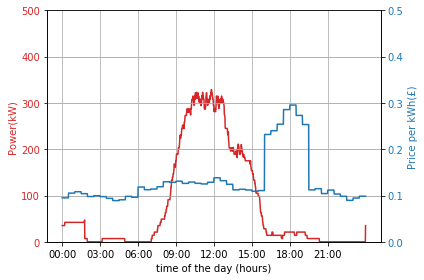

In [15]:
dfC = pd.read_csv("data/sspsbpniv.csv")
dfC.head()

MONTH= np.zeros(len(dfC))
for i in range(len(dfC)):
    MONTH[i] = datetime.datetime.strptime(dfC['Date'].iloc[i], '%d/%m/%Y').date().month

dfC['Month'] = MONTH
month = 2
dfc = dfC[dfC['Month'].eq(month)]

Cost = np.zeros(48)
for i in range(1,49,1):
    dfc1 = dfc[dfc['HalfHour'].eq(i)]
    Cost[i-1] = np.mean(dfc1['import(VAT)'].iloc[:])
cost = np.zeros(1440)

for i in range(len(Cost)):
    cost[(30*(i-1))+30:(30*i)+30] = Cost[i]
        
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time of the day (hours)')
plt.xticks(np.arange(0,1440,180),('00:00','03:00','06:00','09:00','12:00','15:00','18:00','21:00','24:00'))
ax1.set_ylabel('Power(kW)', color=color)
plt.ylim(0,500)
ax1.plot(Feb, color=color)
plt.grid()
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Price per kWh(£)', color=color)  
plt.ylim(0,0.50)
ax2.plot(cost, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  
plt.grid()
plt.show()

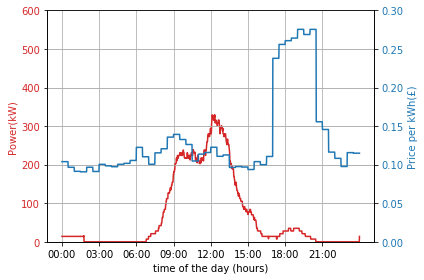

In [16]:
dfC = pd.read_csv("data/sspsbpniv.csv")
dfC.head()

MONTH= np.zeros(len(dfC))
for i in range(len(dfC)):
    MONTH[i] = datetime.datetime.strptime(dfC['Date'].iloc[i], '%d/%m/%Y').date().month

dfC['Month'] = MONTH
month = 8
dfc = dfC[dfC['Month'].eq(month)]

Cost = np.zeros(48)
for i in range(1,49,1):
    dfc1 = dfc[dfc['HalfHour'].eq(i)]
    Cost[i-1] = np.mean(dfc1['import(VAT)'].iloc[:])
cost = np.zeros(1440)

for i in range(len(Cost)):
    cost[(30*(i-1))+30:(30*i)+30] = Cost[i]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time of the day (hours)')
plt.xticks(np.arange(0,1440,180),('00:00','03:00','06:00','09:00','12:00','15:00','18:00','21:00','24:00'))
ax1.set_ylabel('Power(kW)', color=color)
plt.ylim(0,600)
ax1.plot(Aug, color=color)
plt.grid()
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Price per kWh(£)', color=color)  
plt.ylim(0,0.30)
ax2.plot(cost, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  
plt.grid()
plt.show()

In [17]:
Total_cost = np.zeros(12)
for Z in range(12):
    dfC = pd.read_csv("data/sspsbpniv.csv")

    MONTH = np.zeros(len(dfC))
    for i in range(len(dfC)):
        MONTH[i] = datetime.datetime.strptime(dfC['Date'].iloc[i], '%d/%m/%Y').date().month

    dfC['Month'] = MONTH
    month = Z+1
    dfc = dfC[dfC['Month'].eq(month)]

    Cost = np.zeros(48)
    for i in range(1,49,1):
        dfc1 = dfc[dfc['HalfHour'].eq(i)]
        Cost[i-1] = np.mean(dfc1['import(VAT)'].iloc[:])
    cost = np.zeros(1440)

    for i in range(len(Cost)):
        cost[(30*(i-1))+30:(30*i)+30] = Cost[i]
    for e in range(len(cost)):
        cost[e] = cost[e] + 0.14
    Energy = MONTH_POWER[Z,:]/60
    
    Total_cost[Z] = np.sum(Energy*cost)

In [18]:
DF = pd.DataFrame(Total_cost)

DF.to_csv('NO SC PARK AND RIDE WEEKEND COST.csv')

In [19]:
for Z in range(12):
    #Fitting a 10 degree polynomial to the data. This will enable me to creat a probability denisty function(pdf)
    #for the time of day at which a vehicle will enter the Park and Ride. Although a higher degree polynomial could be used,
    #this can lead intergration warnings further down the line.
    x = np.array([0.,1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,11.,12.,13.,14.,15.,16.,17.,18.,19.,20.,21.,22.,23.])

    fit_e = np.polyfit(x,IN[Z], 10)

    fitted_curve_e = fit_e[10] + (x)*fit_e[9] + (x**2)*fit_e[8]+(x**3)*fit_e[7]+(x**4)*fit_e[6]+(x**5)*fit_e[5]+(x**6)*fit_e[4]+(x**7)*fit_e[3]+(x**8)*fit_e[2]+(x**9)*fit_e[1]+(x**10)*fit_e[0]

    denom_e = np.trapz(fitted_curve_e)

    #Scaling using denom so the area under the curve is 1
    pdf_enter = (fit_e[10] + (x)*fit_e[9] + (x**2)*fit_e[8]+(x**3)*fit_e[7]+(x**4)*fit_e[6]+(x**5)*fit_e[5]+(x**6)*fit_e[4]+(x**7)*fit_e[3]+(x**8)*fit_e[2]+(x**9)*fit_e[1]+(x**10)*fit_e[0])/denom_e

    #Fitting a 10 degree polynomial to the data. This will enable me to creat a probability denisty function(pdf)
    #for the time of day at which a vehicle will leave the Park and Ride

    fit = np.polyfit(x,OUT[Z],10)

    fitted_curve_l = fit[10] + (x)*fit[9] + (x**2)*fit[8]+(x**3)*fit[7]+(x**4)*fit[6]+(x**5)*fit[5]+(x**6)*fit[4]+(x**7)*fit[3]+(x**8)*fit[2]+(x**9)*fit[1]+(x**10)*fit[0]

    denom = np.trapz(fitted_curve_l)
    #Scaling using denom so the area under the curve is 1
    pdf_leave = (fit[10] + (x)*fit[9] + (x**2)*fit[8]+(x**3)*fit[7]+(x**4)*fit[6]+(x**5)*fit[5]+(x**6)*fit[4]+(x**7)*fit[3]+(x**8)*fit[2]+(x**9)*fit[1]+(x**10)*fit[0])/denom
    
    num = int(np.sum(IN[Z])*0.3)
    print(num)

143
157
140
167
164
154
138
137
150
185
217
163
